# <center>Financial Portfolio Optimization</center>

In [1]:
from ml import data_preprocessing as dp
from ml import forecasting as fc

In [ ]:
from ga import cov_ga as cga
import matplotlib.pyplot as plt


In [2]:
import importlib
importlib.reload(dp)

<module 'ml.data_preprocessing' from 'd:\\University\\4th Year\\CM4601 Computational Intelligence\\ea-portfolio-optimization\\ml\\data_preprocessing.py'>

In [3]:
selected_symbols = ['AAPL', 'MSFT', 'GOOGL', 'AMZN', 'JPM']

In [13]:
df = dp.load_data("data/prices.csv", selected_symbols)
returns = dp.compute_returns(df)
norm_returns = dp.normalize_returns(returns)

d:\University\4th Year\CM4601 Computational Intelligence\ea-portfolio-optimization\ml\data_preprocessing.py:19: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df_pivoted = df_pivoted.fillna(method='ffill').dropna()


In [14]:
expected_returns = fc.forecast_returns_arima(norm_returns, forecast_horizon=1)
cov_matrix = fc.compute_covariance_matrix(norm_returns)

c:\Users\misha\anaconda3\envs\portfolio_optimization\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\misha\anaconda3\envs\portfolio_optimization\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\misha\anaconda3\envs\portfolio_optimization\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\misha\anaconda3\envs\portfolio_optimization\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. 

In [15]:
ga = cga.GeneticOptimizer(
    pop_size=50,
    ngen=20, 
    tourn_size=3, 
    cxpb=0.7, 
    mutpb=0.2, 
    mut_step=0.05, 
    risk_free_rate=0.0
    )

In [16]:
best_ind, best_fit, best_fits = ga.run(expected_returns, cov_matrix)

Best Fitness (Sharpe): 0.0021924244292601583
Best Portfolio Allocation:
AAPL: 0.3940
AMZN: 0.3900
GOOGL: 0.0045
JPM: 0.0567
MSFT: 0.1548
Best Fitness (Sharpe): 0.0049964489955475686
Best Portfolio Allocation:
AAPL: 0.1888
AMZN: 0.5893
GOOGL: 0.0012
JPM: 0.1050
MSFT: 0.1157
Best Fitness (Sharpe): 0.0049964489955475686
Best Portfolio Allocation:
AAPL: 0.1888
AMZN: 0.5893
GOOGL: 0.0012
JPM: 0.1050
MSFT: 0.1157
Best Fitness (Sharpe): 0.0049964489955475686
Best Portfolio Allocation:
AAPL: 0.1888
AMZN: 0.5893
GOOGL: 0.0012
JPM: 0.1050
MSFT: 0.1157
Best Fitness (Sharpe): 0.0049964489955475686
Best Portfolio Allocation:
AAPL: 0.1888
AMZN: 0.5893
GOOGL: 0.0012
JPM: 0.1050
MSFT: 0.1157
Best Fitness (Sharpe): 0.0049964489955475686
Best Portfolio Allocation:
AAPL: 0.1888
AMZN: 0.5893
GOOGL: 0.0012
JPM: 0.1050
MSFT: 0.1157
Best Fitness (Sharpe): 0.0049964489955475686
Best Portfolio Allocation:
AAPL: 0.1888
AMZN: 0.5893
GOOGL: 0.0012
JPM: 0.1050
MSFT: 0.1157
Best Fitness (Sharpe): 0.0055275778149938

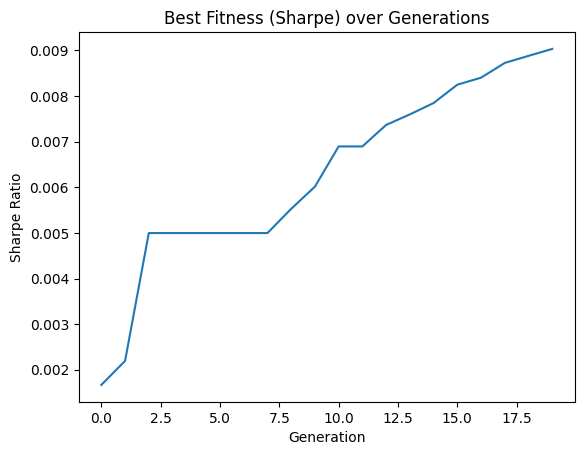

In [18]:
plt.plot(best_fits)
plt.title('Best Fitness (Sharpe) over Generations')
plt.xlabel('Generation')
plt.ylabel('Sharpe Ratio')
plt.show()